**Инструкция по выполнению проекта:**
    
   Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

    Часть 1. Приоритизация гипотез.
    В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

**Задача**

1. Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
2. Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
3. Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

**Часть 2. Анализ A/B-теста**

Вы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

**Задача**
 Проанализируйте A/B-тест:

1. Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
2. Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
3. Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
4. Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.
5. Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.
6. Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
7. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
8. Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
9. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
10. Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.
11. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
12. Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.
13. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
14. Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

## Шаг 1. Загрузим данные и подготовьте их к анализу

In [1]:
import pandas as pd
import datetime as dt
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
%config InlineBackend.figure_format='retina'
import warnings
warnings.filterwarnings('ignore')


hypothesis = pd.read_csv('/datasets/hypothesis.csv')
pd.set_option('display.max_colwidth', 1000)

orders = pd.read_csv('/datasets/orders.csv', sep=',')

visitors = pd.read_csv('/datasets/visitors.csv', sep=',')

<div class="alert alert-success">

<b>✔️ Комментарий ревьюера:</b> Круто, что умеешь настраивать вывод!

</div>

### Подготовим данные к анальзу

In [2]:
#Рассмотрим датасет `hypothesis`
display('Датасет hypothesis', hypothesis)
display('Столбцы', hypothesis.columns)
display('Иформация по типу данных', hypothesis.info())
display('Сумма дубликатов', hypothesis.duplicated().sum())

'Датасет hypothesis'

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


'Столбцы'

Index(['Hypothesis', 'Reach', 'Impact', 'Confidence', 'Efforts'], dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


'Иформация по типу данных'

None

'Сумма дубликатов'

0

**Вывод:**

Датасет hypothesis хранит информацию о гипотезах.

Содержит информацию в столбцах:

* Hypothesis — краткое описание гипотезы;
* Reach — охват пользователей по 10-балльной шкале;
* Impact — влияние на пользователей по 10-балльной шкале;
* Confidence — уверенность в гипотезе по 10-балльной шкале;
* Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Дубликатов и пропусков нет.

In [3]:
# Для удобства пиведем к нижнему регистр название столбцов
hypothesis.columns = hypothesis.columns.str.lower()
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
hypothesis    9 non-null object
reach         9 non-null int64
impact        9 non-null int64
confidence    9 non-null int64
efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [4]:
#Рассмотрим датасет `visits`
display('Датасет visitors', visitors)
display('Столбцы', visitors.columns)
display('Иформация по типу данных', visitors.info())
display('Сумма дубликатов', visitors.duplicated().sum())

'Датасет visitors'

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


'Столбцы'

Index(['date', 'group', 'visitors'], dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


'Иформация по типу данных'

None

'Сумма дубликатов'

0

In [5]:
visitors['date'] = pd.to_datetime(visitors['date'])
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null datetime64[ns]
group       62 non-null object
visitors    62 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


**Вывод:**

Датасет `visitors` содержит информацию о группах пользователей. 

Содержит информацию в сталбцах:

* date — дата;
* group — группа A/B-теста;
* visitors — количество пользователей в указанную дату в указанной группе A/B-теста

Дубликатов нет, пропусков нет. Столбец `data` имеет не верный тип данных (object), нужно исправить.

In [6]:
#Рассмотрим датасет `orders`
display('Датасет orders', orders)
display('Столбцы', orders.columns)
display('Иформация по типу данных', orders.info())
display('Сумма дубликатов', orders.duplicated().sum())

'Датасет orders'

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


'Столбцы'

Index(['transactionId', 'visitorId', 'date', 'revenue', 'group'], dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


'Иформация по типу данных'

None

'Сумма дубликатов'

0

In [7]:
# Для удобства пиведем к нижнему регистр название столбцов
orders.columns = orders.columns.str.lower()
# Переименуем столбцы
orders = orders.rename(columns={'transactionid': 'transaction_id', 'visitorid': 'visitor_id'})
# Изменим тип данных в столбце `date` 
orders['date'] = pd.to_datetime(orders['date'])
# Проверим результат
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transaction_id    1197 non-null int64
visitor_id        1197 non-null int64
date              1197 non-null datetime64[ns]
revenue           1197 non-null int64
group             1197 non-null object
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


**Вывод:**

Датасет `orders` содержит информацию о заказах. 

Содержит информацию в столбцах:

* transaction_id — идентификатор заказа;
* visitor_id — идентификатор пользователя, совершившего заказ;
* date — дата, когда был совершён заказ;
* revenue — выручка заказа;
* group — группа A/Bтеста, в которую попал заказ.

Пропусков нет, дубликатов тоже нет.

### Проверим есть ли пользователи, которые попали в обе группы теста

In [8]:
# Проверим есть ли пользватели, которые попали в обе группы одновременно.
visitor_two_group = orders.groupby('visitor_id').agg({'group': 'nunique'}).reset_index()
visitor_two_group = visitor_two_group.query('group > 1')
visitor_two_group['visitor_id'].count()

58

Выходит, что у нас 58 пользователей, который попали в группы А и В.

### Проверим баланс между группами

In [9]:
# Посмотрим баланс между группами
ab_total = orders.groupby('group', as_index=False)['visitor_id'].count()
ab_total

,group,visitor_id
0,A,557
1,B,640


Видим, что количество пользователей в группе В боьше чем в группе А на 83 человека.

### Посмотрим на начальную и конечную дату теста

In [10]:
# Посмотрим какая была начальная дата теста
orders['date'].min()

Timestamp('2019-08-01 00:00:00')

In [11]:
# Посмотрим на конечную дату теста
orders['date'].max()

Timestamp('2019-08-31 00:00:00')

Тест начался 2019-08-01 и закончился 2019-08-31. На тест было отведено времено ровно месяц.

## Шаг 2. Часть 1. Приоритизация гипотез

### Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [12]:
# Выведим hypothesis на экран
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [13]:
# Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.
hypothesis['ICE'] = (hypothesis['impact']
                     * hypothesis['confidence'] 
                     / hypothesis['efforts'])
display(round(hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)))

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.0


Наиболее перспективные гипотизы по ICE: 

    1. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей.
    8. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.
    9. Запустить акцию, дающую скидку на товар в день рождения. 
    
Наиболее перспективная, гипотеза из этих трёх, гипотеза №9.    

### Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [14]:
# Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.
hypothesis['RICE'] = ((hypothesis['reach'] 
                       * hypothesis['impact'] 
                       * hypothesis['confidence']) 
                      / hypothesis['efforts'] )
display(hypothesis[['hypothesis', 'RICE']]
              .sort_values(by='RICE', ascending=False))

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Наиболее перспективные гипотизы по RICE: 

    1. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей.
    3. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа.
    7. Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию.
    8. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.

**Вывод:**

Между ICE и RICE совпали две гипотизы 1 и 8, но в RICE на первом месте уже гипотеза №8, так получилось потому что её параматр `reach` равен 10, а это больше чем у всех остальных гипотиз.

## Шаг 3. Часть 2. Анализ A/B-теста

### Соберем нужные кумулятивные данные

In [15]:
# Соберем нужные кумулятивные данные
datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'],
                                   orders['group'] == x['group'])].agg({
        'date': 'max',
        'group': 'max',
        'transaction_id': pd.Series.nunique,
        'visitor_id': pd.Series.nunique,
        'revenue': 'sum'
    }), axis=1).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'],
                                     visitors['group'] == x['group'])].agg({
        'date': 'max',
        'group': 'max',
        'visitors': 'sum'}), axis=1).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], 
                                        right_on=['date', 'group'])

cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
# Выведим результат на экран
display(cumulativeData.head(5))

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


### Построим график кумулятивной выручки по группам. Сделаем выводы и предположения.

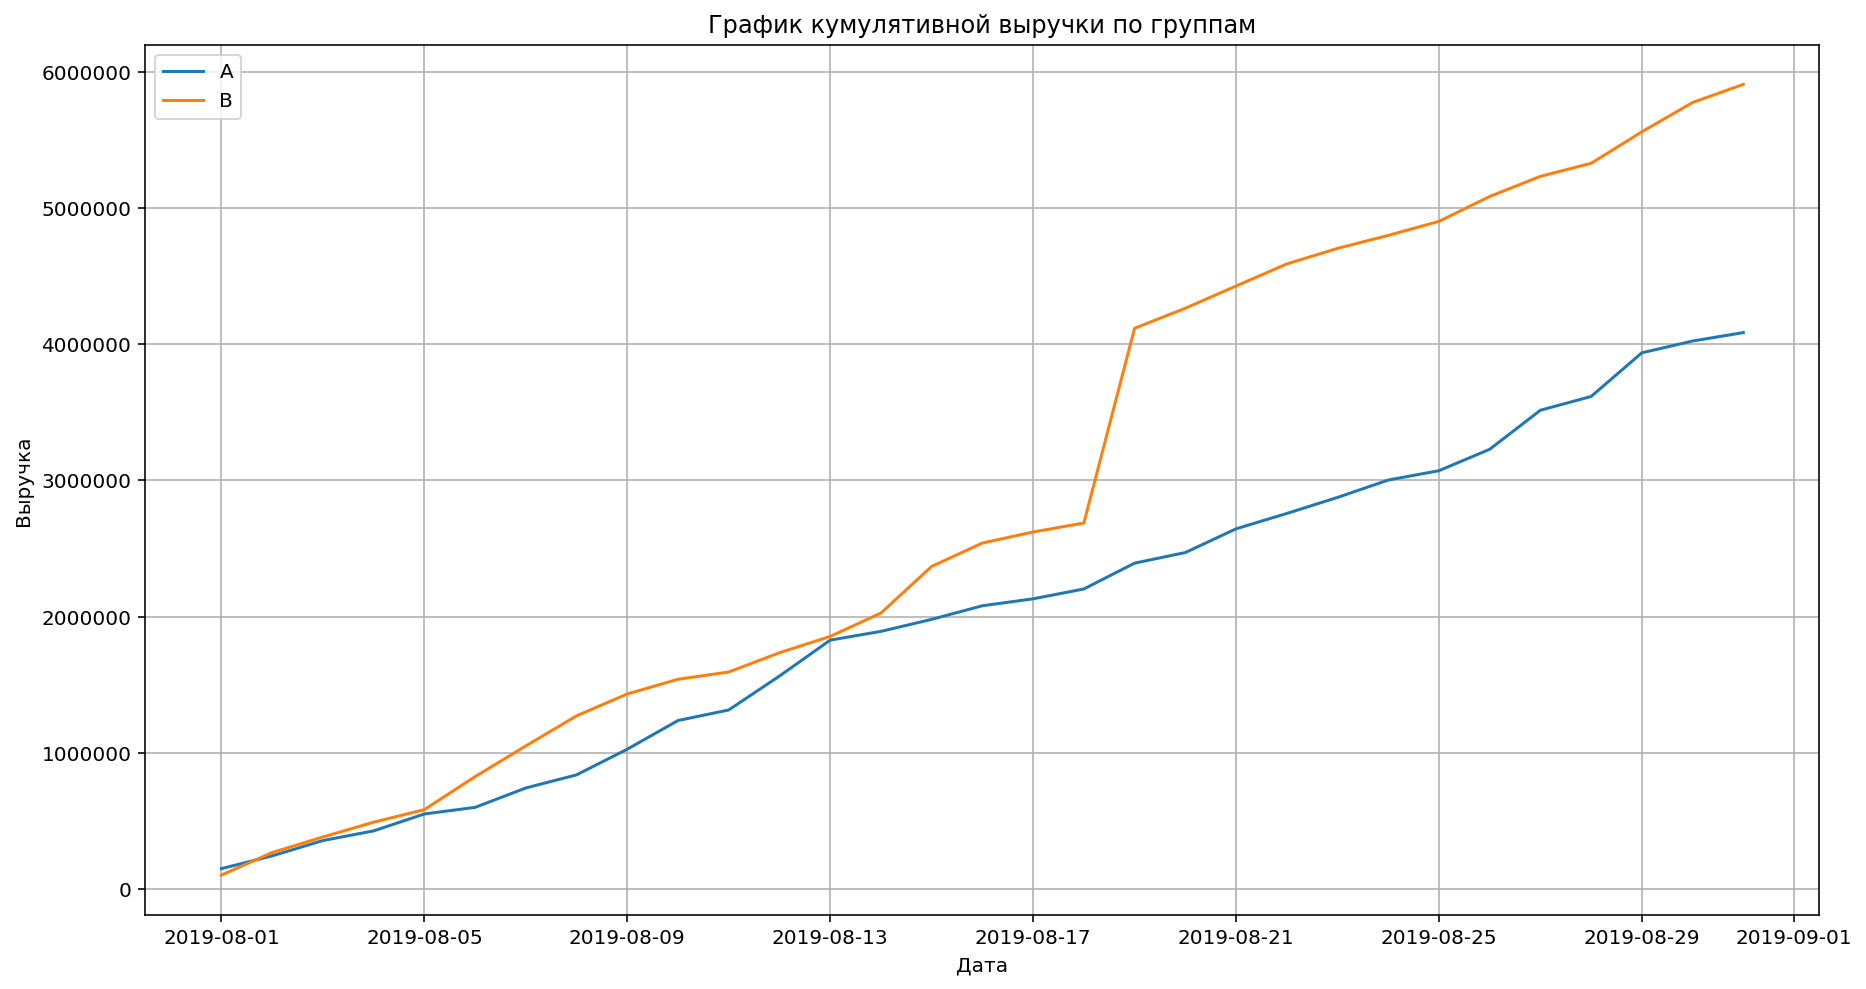

In [16]:
cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

# Датафрейм с кумуляитивным количеством заказов и кумулятивной выручкой по дням группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][['date', 'revenue', 'orders']]
# Датафрейм с кумуляитивным количеством заказов и кумулятивной выручкой по дням группе B 
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][['date', 'revenue', 'orders']]

# Построим график кумулятивной выручки по группам
plt.figure(figsize=(15,8))
plt.grid()

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend()
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.title('График кумулятивной выручки по группам')
plt.show()

На графике видно, что группа В лидирует на протяжении всего времени, видимо аномально большие заказы влияют на результаты. 

### Постром график кумулятивного среднего чека по группам. Сделаем выводы и предположения.


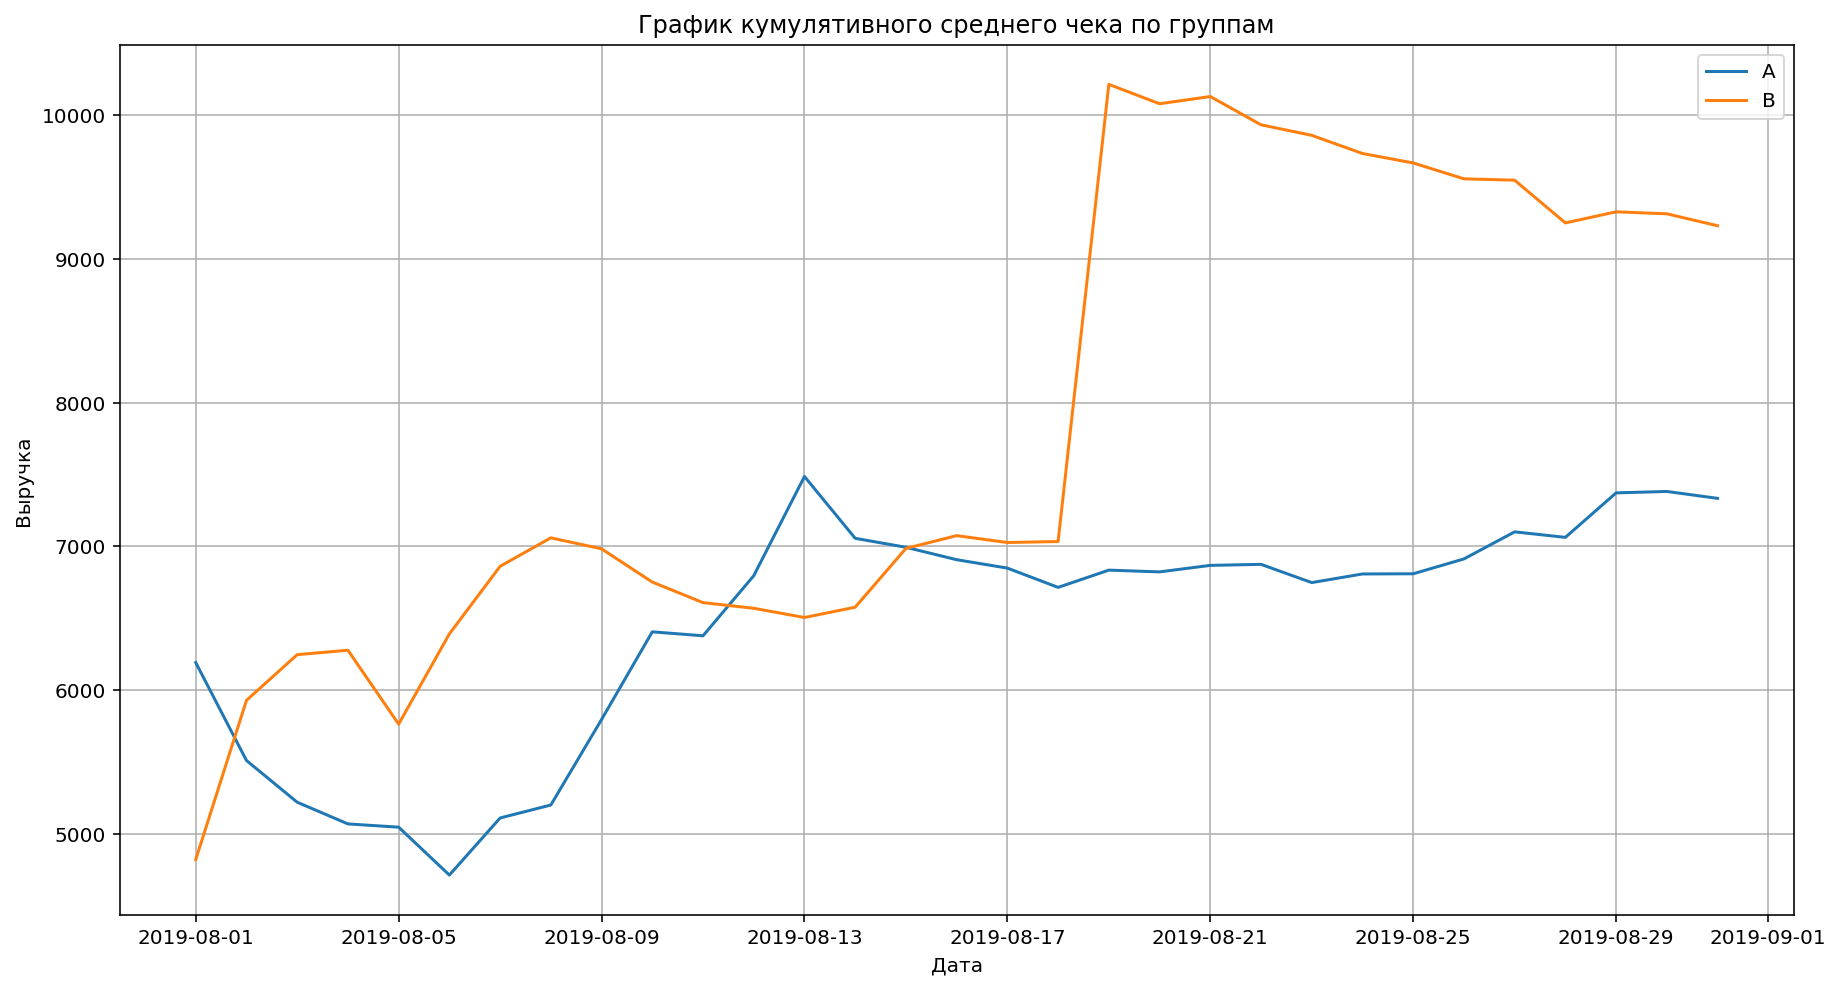

In [17]:
# Датафрейм с кумуляитивным средним чеком и кумулятивной выручкой по дням группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][
    ['date', 'revenue', 'orders']
]

# Датафрейм с кумуляитивным средним чеком и кумулятивной выручкой по дням группе В
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][
    ['date', 'revenue', 'orders']
]

# Посторим график кумулятивного среднего чека по группам
plt.figure(figsize=(15,8))
plt.grid()

plt.plot(cumulativeRevenueA['date'], 
         cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], 
         cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.legend()
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.title('График кумулятивного среднего чека по группам')
plt.show()

Кумулятивные значения среднего чека колеблются на протяжении всего времени. Принимать решение по этой метрике рано. Скорее всего требуется дополнительный анализ выбросов, которые сильно искажают результаты.

### Постром график относительного изменения кумулятивного среднего чека группы B к группе A. Сделам выводы и предположения.

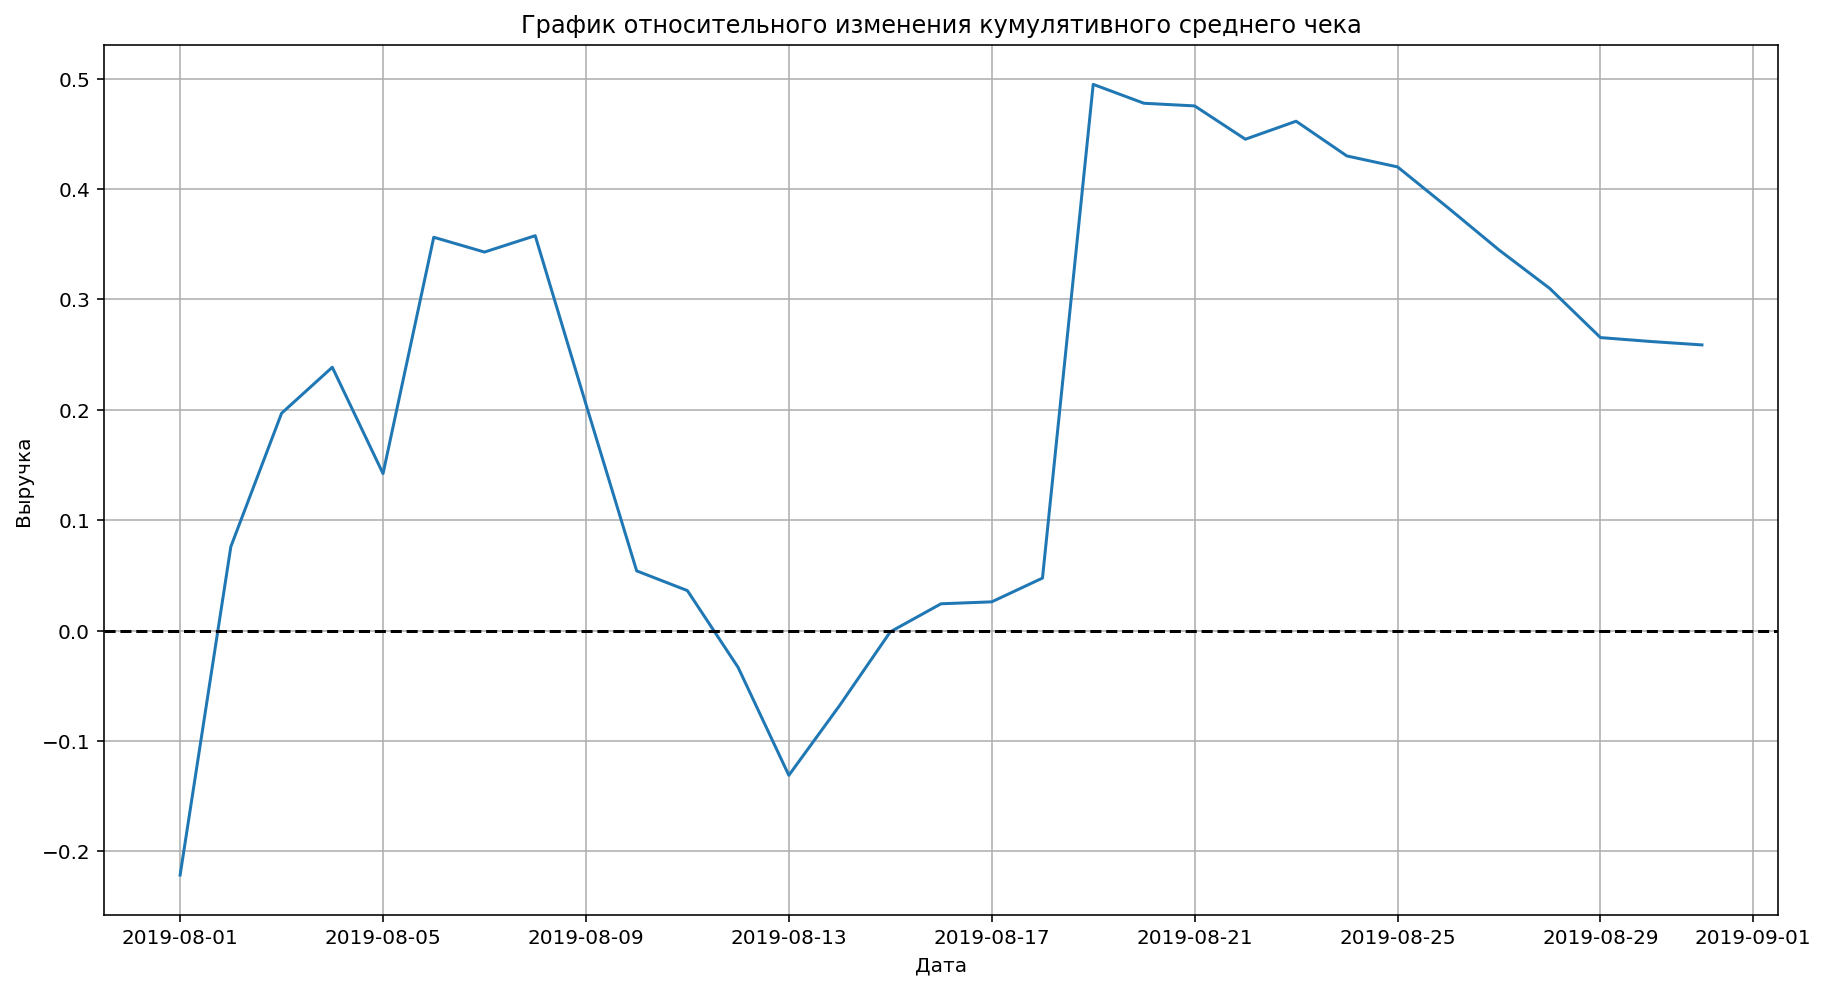

In [18]:
mergedCumulativeRevenue = (cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', 
                                                    right_on='date', how='left', 
                                                    suffixes=['A', 'B']))
mergedCumulativeRevenue.columns = ['date', 'revenueA', 'revenueB', 'ordersA', 'ordersB']

# Постром график относительного изменения кумулятивного среднего чека
plt.figure(figsize=(15,8))
plt.grid()

plt.plot(mergedCumulativeRevenue['date'], 
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])
         /(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

plt.axhline(y=0, color='black', linestyle='--')

plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.title('График относительного изменения кумулятивного среднего чека')
plt.show()

По графику относительного изменения кумулятивного среднего чека группы B к группе A, видим что, результаты, в несколько дат, резко менялись. Видимо в эти даты и были совершены аномальные заказы.

### Построим график кумулятивной конверсии по группам. Сделаем выводы и предположения.

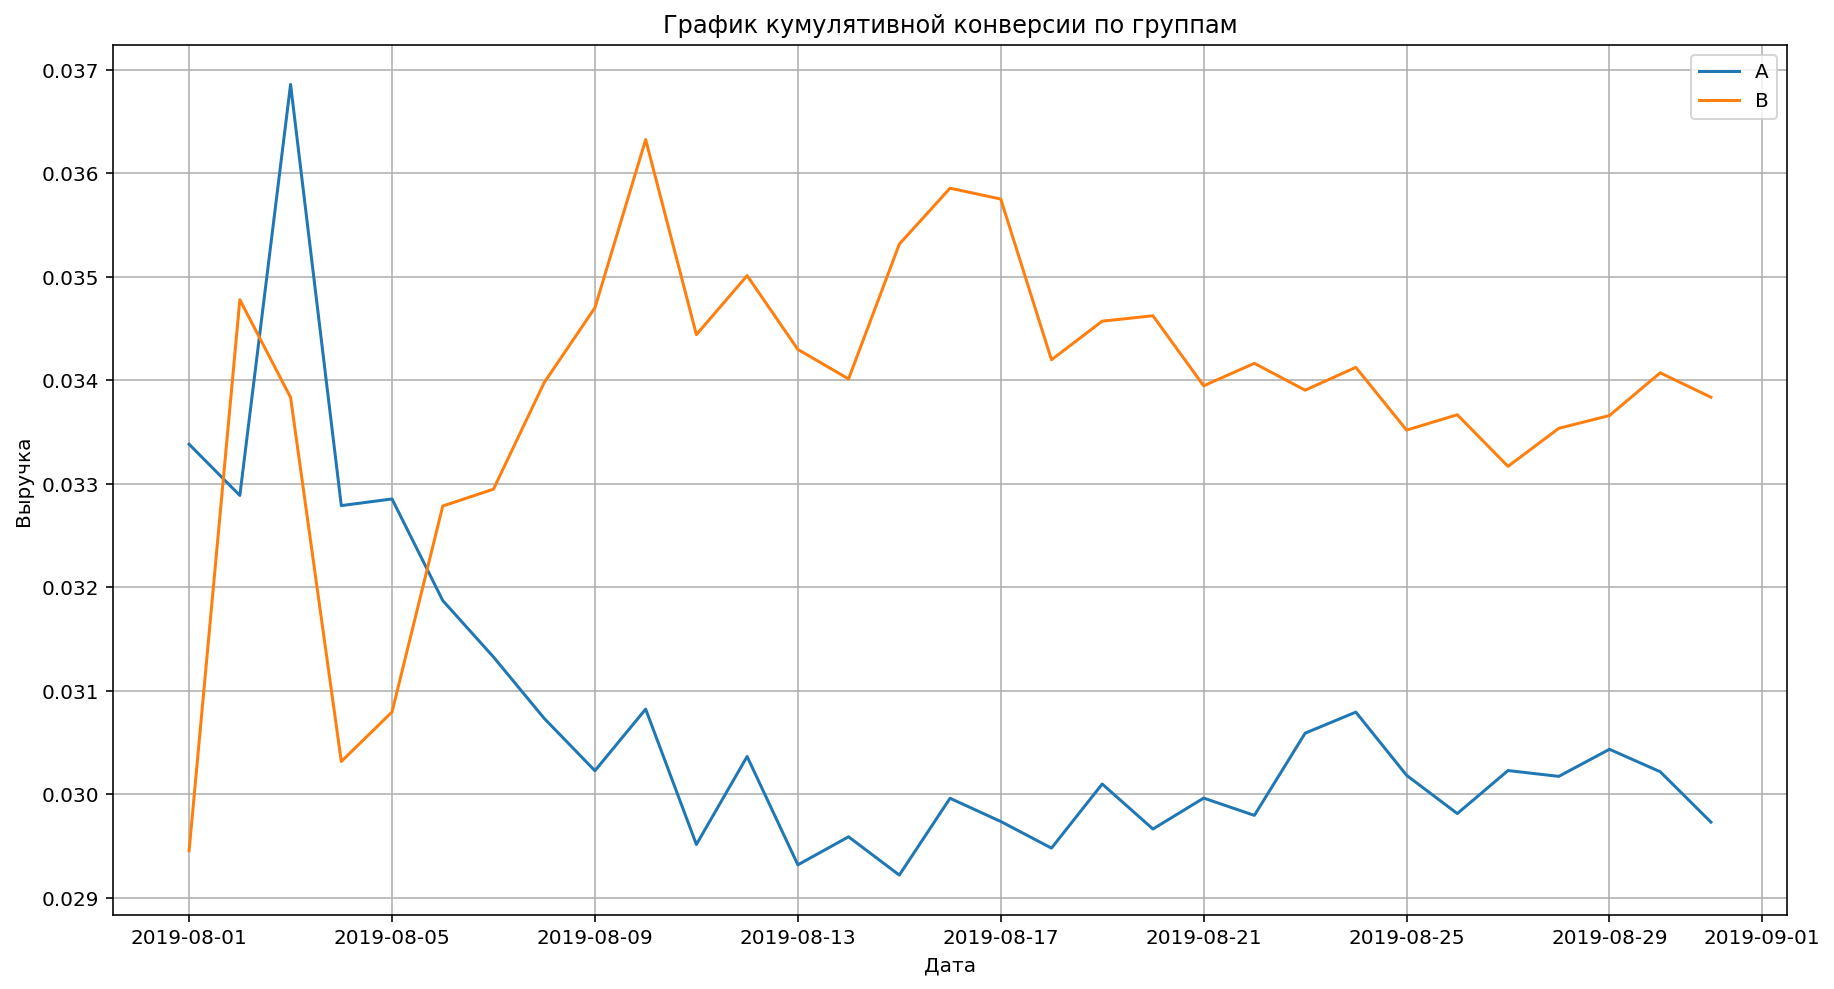

In [19]:
cumulativeData['conversion'] = cumulativeData['orders'] / cumulativeData['visitors']

cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']

# Построим график кумулятивной конверсии по группам
plt.figure(figsize=(15,8))
plt.grid()

plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')

plt.legend()
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.title('График кумулятивной конверсии по группам')
plt.show()

По графику кумулятивной конверсии по группам, видим, что в начале конверсии у группы А была выше чем у группы В, затем видим резкий спад у группы А, а угруппы В на оборот резкий скачёк вверх. Обе группы не выровнелись, напротяжении всего времрени. 

### Построим график относительного изменения кумулятивной конверсии группы B к группе A. Сделаем выводы и предположения.


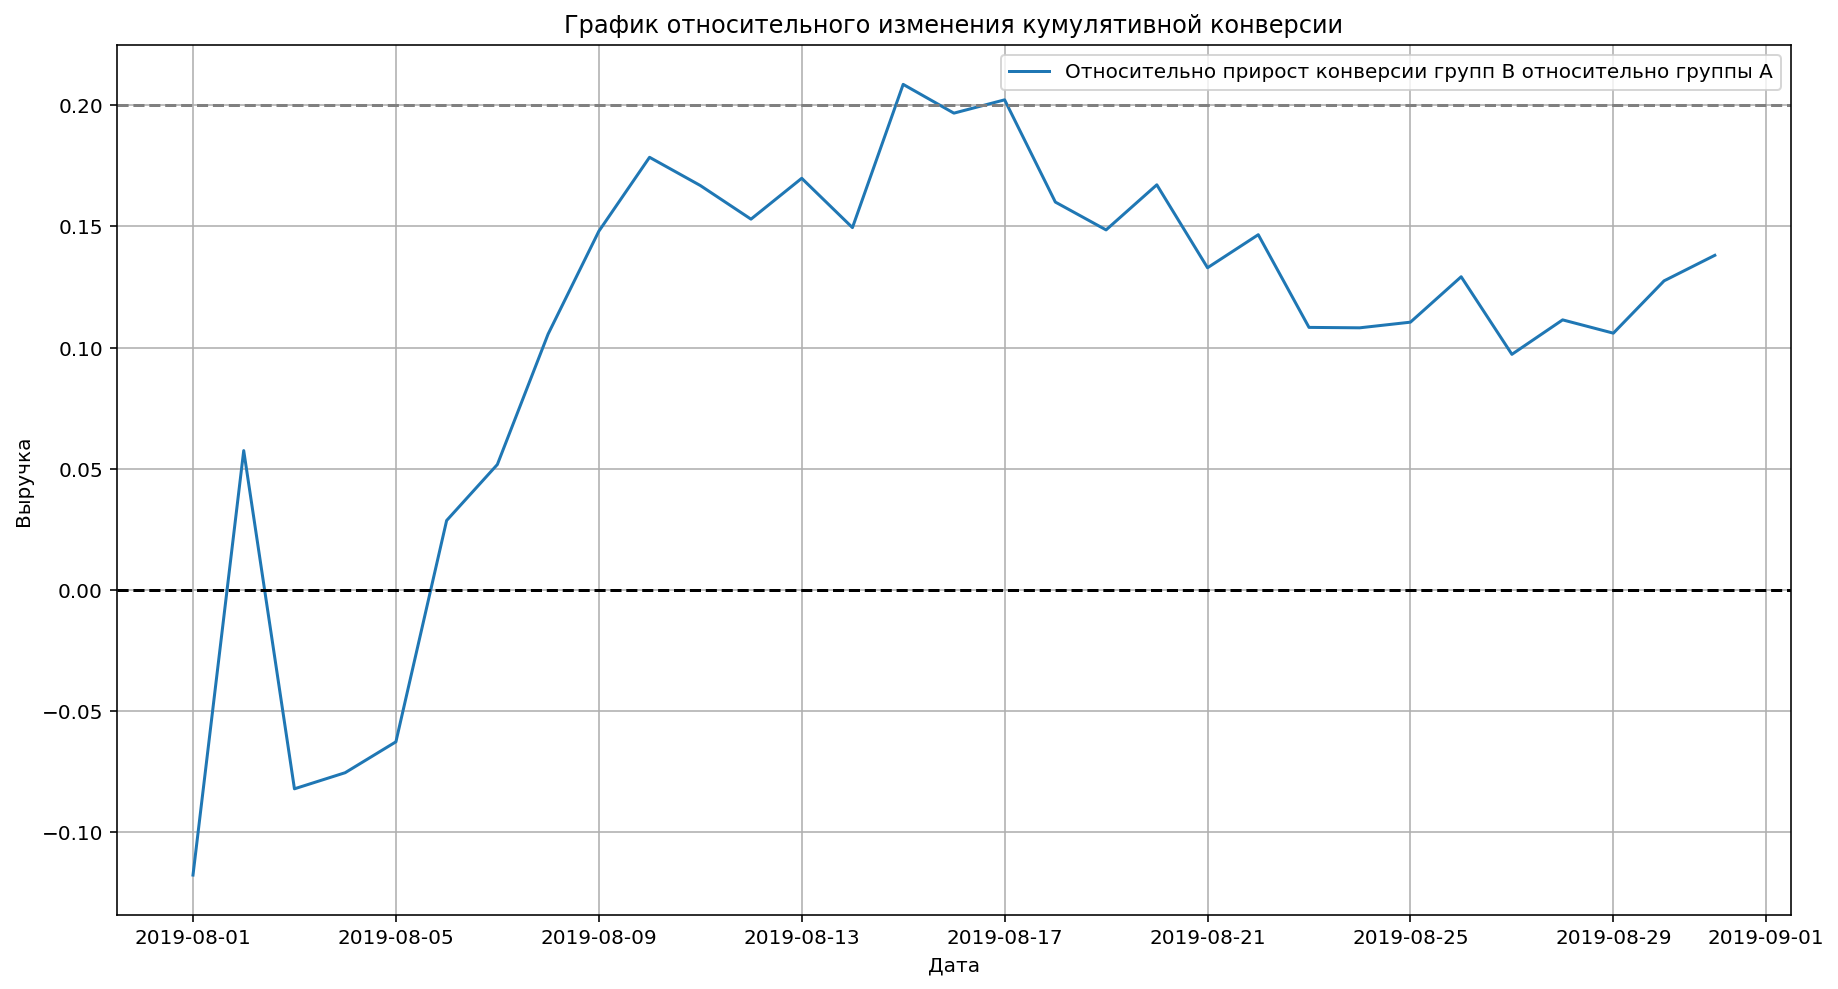

In [20]:
mergedCumulativeConversions = (cumulativeDataA[['date', 'conversion']]
                               .merge(cumulativeDataB[['date', 'conversion']], 
                                      left_on='date', right_on='date', how='left', 
                                      suffixes=['A', 'B']))

# Постром график относительного изменения кумулятивной конверсии группы B к группе A
plt.figure(figsize=(15,8))
plt.grid()

plt.plot(mergedCumulativeConversions['date'], 
         mergedCumulativeConversions['conversionB'] 
         / mergedCumulativeConversions['conversionA']-1, 
         label='Относительно прирост конверсии групп B относительно группы A')

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')

plt.legend()
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.title('График относительного изменения кумулятивной конверсии')
plt.show()

По графику относительного изменения кумулятивной конверсии группы B к группе A видим, что группа В лидирует по конверсии, 5 числа виден резкий скачок вверх, но ведёт себя не стабильно и медленно снижается.

### Построим точечный график количества заказов по пользователям. Сделаем выводы и предположения.


In [21]:
# Найдём число заказов по пользователям

ordersByUsers = (orders.groupby('visitor_id', as_index=False )
                .agg({'transaction_id': pd.Series.nunique}))
ordersByUsers.columns = ['visitor', 'orders']
print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

         visitor  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


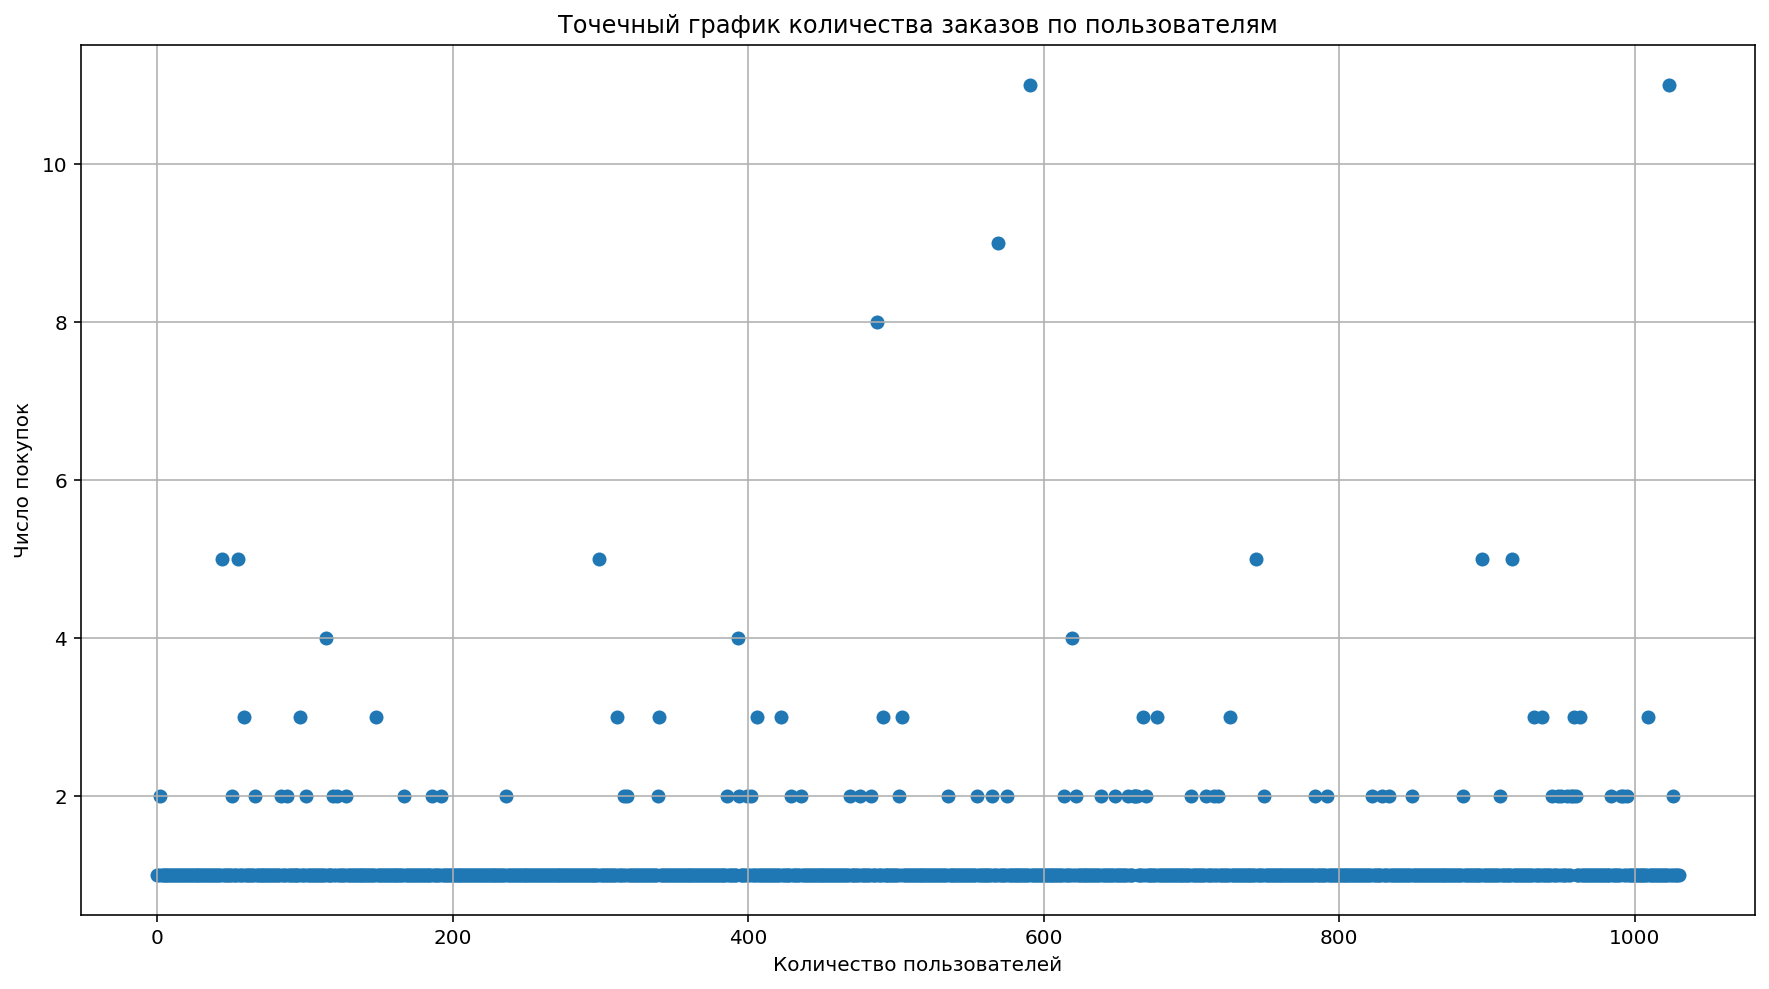

In [22]:
x_values = pd.Series(range(0, len(ordersByUsers['orders'])))
plt.figure(figsize=(15, 8))
plt.grid()
plt.scatter(x_values, ordersByUsers['orders'])
plt.xlabel('Количество пользователей')
plt.ylabel('Число покупок')
plt.title('Точечный график количества заказов по пользователям')
# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))

По графику количества заказов по пользователям, большая часть пользователей сделала по одному заказу. Пользователей, которые зделали 2 и более заказов гораздо меньше. Они могут быть аномальными. 

### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберим границу для определения аномальных пользователей

In [23]:
# Найдём число заказов по пользователям
ordersByUsers = (orders.groupby('visitor_id', as_index=False )
                .agg({'transaction_id': pd.Series.nunique}))
ordersByUsers.columns = ['visitor_id', 'orders']
print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

      visitor_id  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


In [24]:
# Посчитаем 95-й и 99-й перцентили количества заказов на пользователя.
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[2. 4.]


Около 5-ти процентов пользователей совершили 2 покупки и не более 1-го процента пользователей около 4 покупок. 

Выберим границу для определения аномальных пользователей, которые сделали не более 2-х покупок

### Построим точечный график стоимостей заказов.

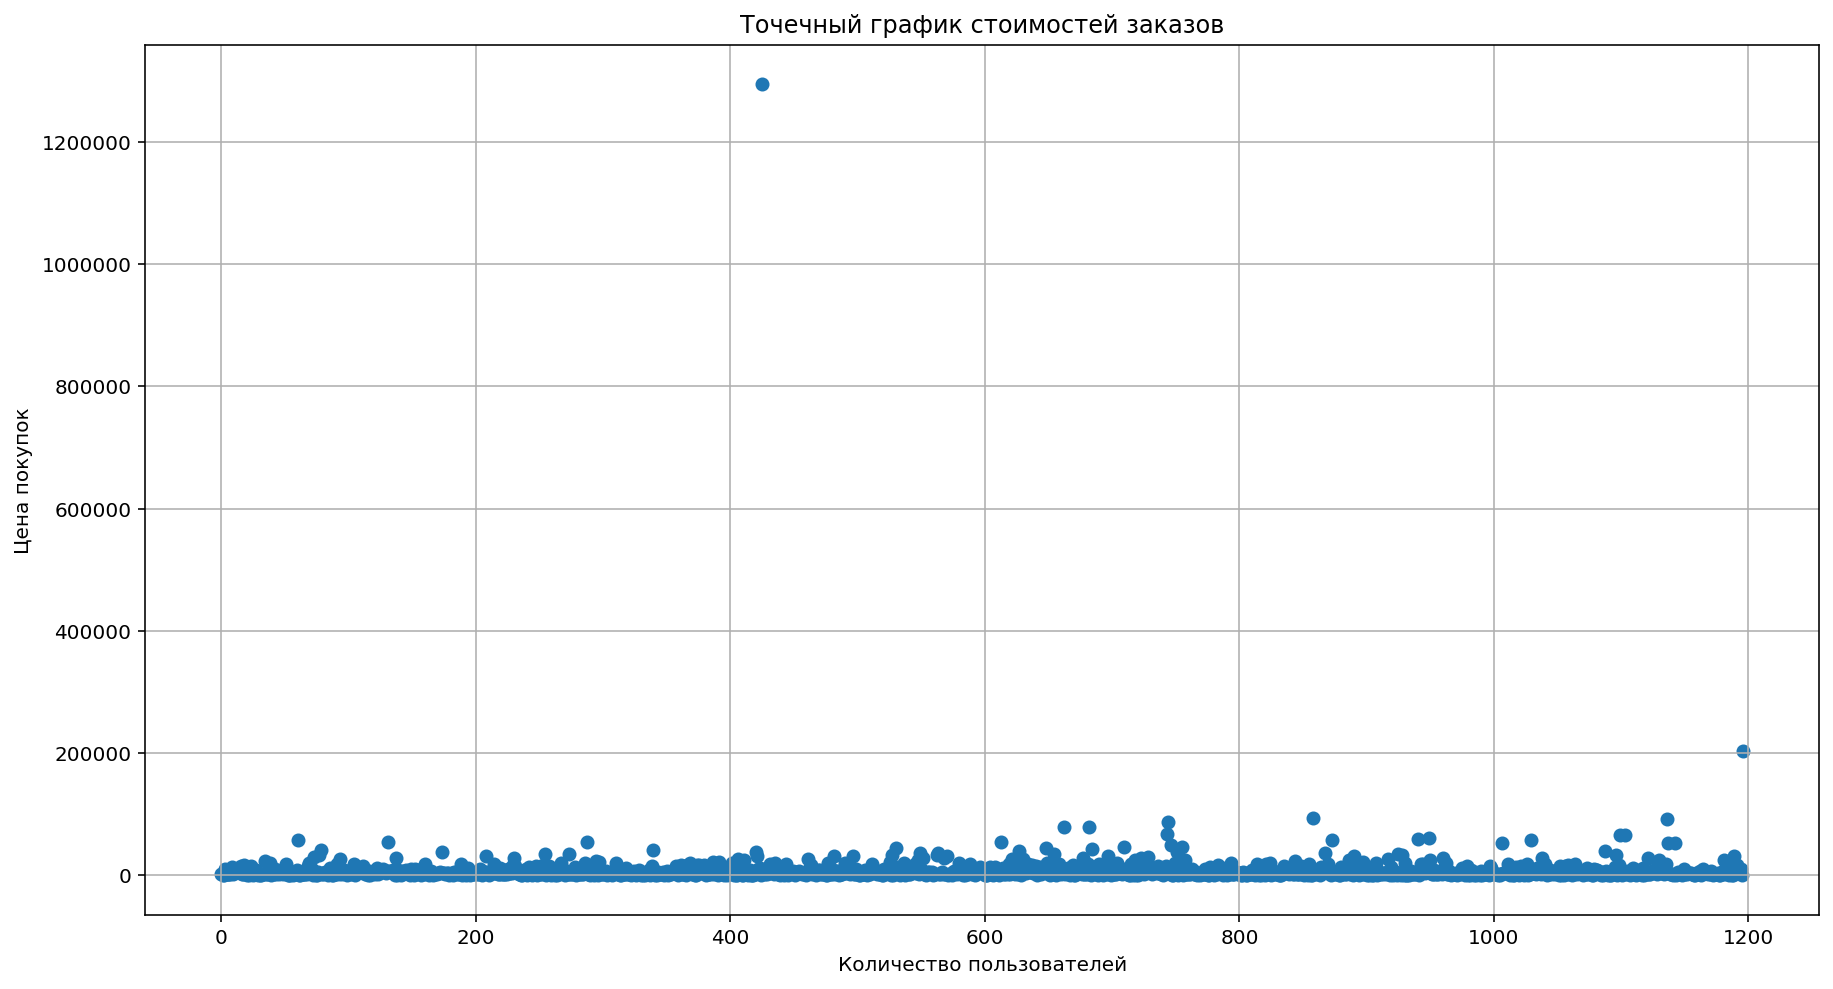

In [25]:
# Постройте гистограмму распределения числа заказов по пользователям
#x_values = pd.Series(range(0, len(ordersByUsers['orders'])))
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize=(15, 8))
plt.grid()
plt.scatter(x_values, orders['revenue'])
plt.xlabel('Количество пользователей')
plt.ylabel('Цена покупок')
plt.title('Точечный график стоимостей заказов')
plt.show()
#plt.scatter(x_values, orders['revenue'])
# серия из чисел от 0 до количества наблюдений в ordersByUsers
#x_values = pd.Series(range(0, len(orders)))

По графику видим, что большенство заказов были совершены до 200 000. Есть так же выбросы в районе 200 и более 1 200 000, которые могут быть анамальными.

**Построим точечный график стоимостей заказов без бывросов**

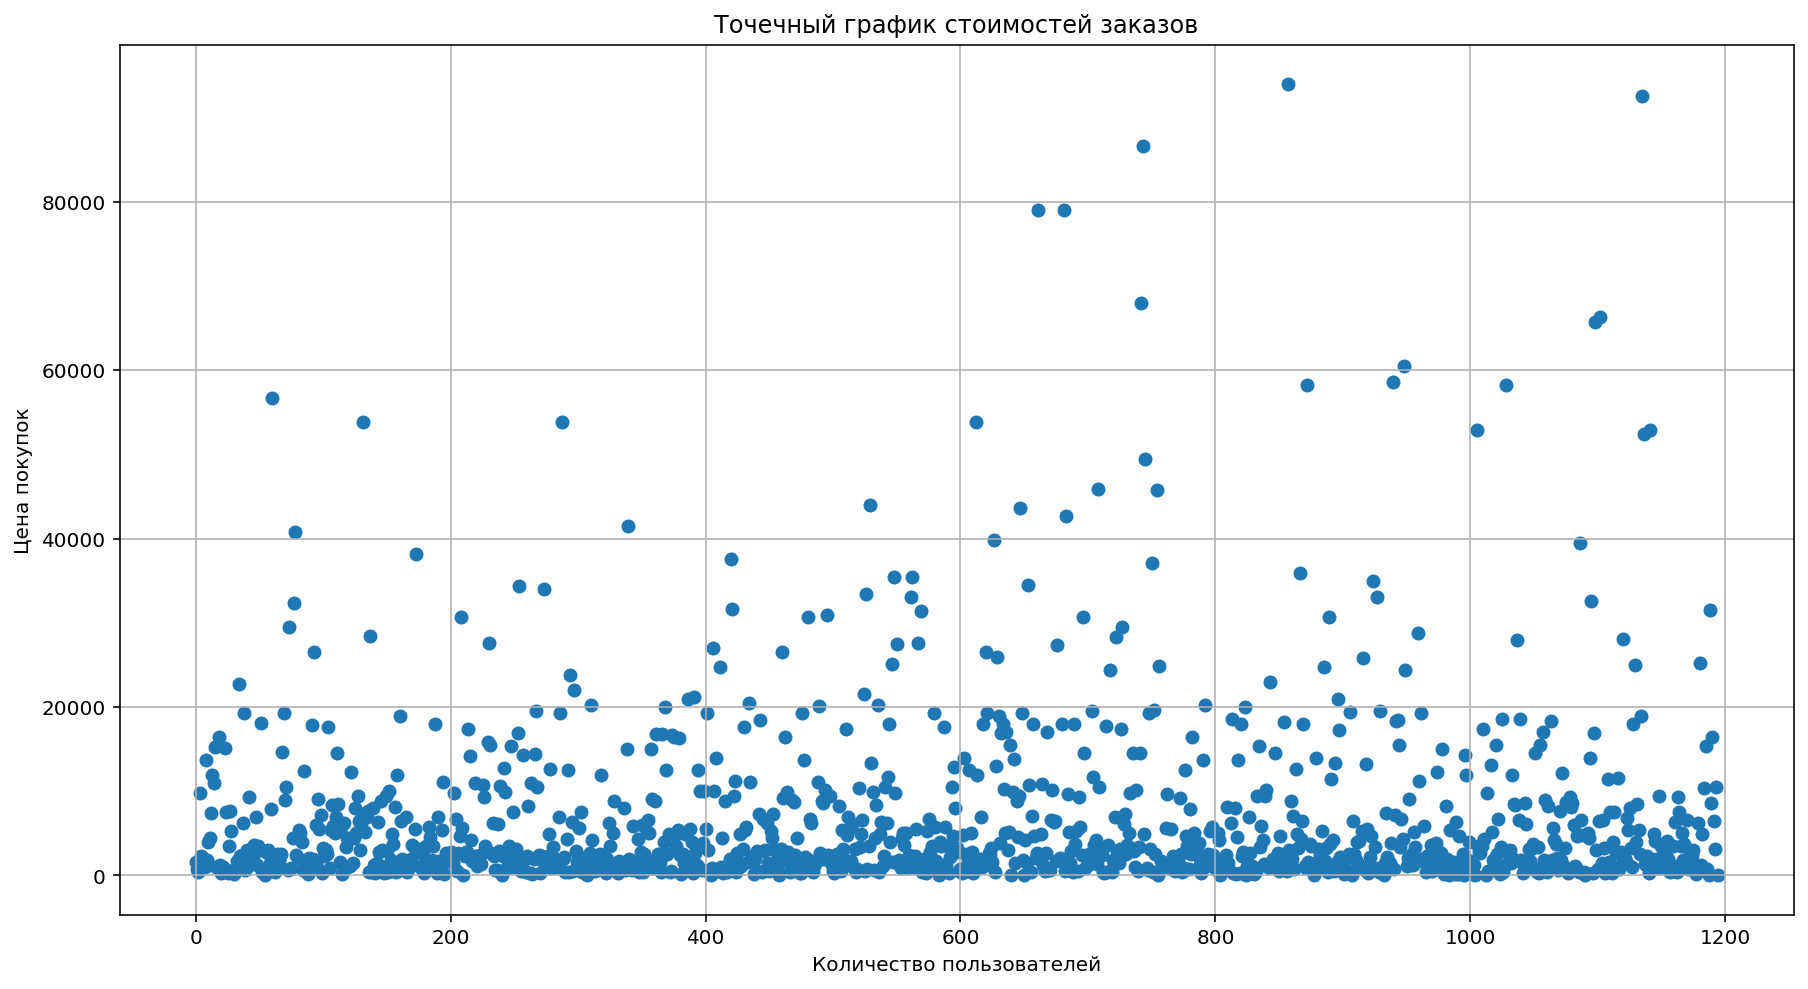

In [26]:
new_orders = orders[orders['revenue'] < 200000]
x_values = pd.Series(range(0, len(new_orders['revenue'])))
plt.figure(figsize=(15, 8))
plt.grid()
plt.scatter(x_values, new_orders['revenue'])
plt.xlabel('Количество пользователей')
plt.ylabel('Цена покупок')
plt.title('Точечный график стоимостей заказов')
plt.show()

По графику видим очень много мелких заказов, которые меньше 20000 и гораздо меньше больше 60000.

### Посчитайте 95-й и 99-й перцентили стоимости заказов.

In [27]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


5% пользователей совершили покупки на сумму 28000 и 1% пользователй на сумму 58233.

Выберим границу для определения аномальных пользователей, цена покпок которых не привешает 28000.

### Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным.

Составим нулевую и альтернативную гипотезы.

H₀(нулевая гипотеза) всегда используется так, что использовать знак равенства.

    H₀: данные в выборках взяты из одной и той же генеральной совокупности
    H₁: данные в выборках взяты из разных генеральных совокупностей.

**Начнём с подготовки данных. Постороим таблицу data**

In [28]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)
#Проверим результат
display(data.head(5))

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Названия столбцов таблицы `data`:
    
    date — дата;
    ordersPerDateA — количество заказов в выбранную дату в группе A;
    revenuePerDateA — суммарная выручка в выбранную дату в группе A;
    ordersPerDateB — количество заказов в выбранную дату в группе B;
    revenuePerDateB — суммарная выручка в выбранную дату в группе B;
    ordersCummulativeA — суммарное число заказов до выбранной даты включительно в группе A;
    revenueCummulativeA — суммарная выручка до выбранной даты включительно в группе A;
    ordersCummulativeB — суммарное количество заказов до выбранной даты включительно в группе B;
    revenueCummulativeB — суммарная выручка до выбранной даты включительно в группе B;
    visitorsPerDateA — количество пользователей в выбранную дату в группе A;
    visitorsPerDateB — количество пользователей в выбранную дату в группе B;
    visitorsCummulativeA — количество пользователей до выбранной даты включительно в группе A;
    visitorsCummulativeB — количество пользователей до выбранной даты включительно в группе B.

**Посчитаем статистическую значимость различия в конверсии между группами.**

In [29]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
# Округлим до трёх знаков после запятой
print('Значение p-value =', "{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('Относительное различие в конверсии =', "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))


Значение p-value = 0.008
Относительное различие в конверсии = 0.138


P-value горазадо меньше чем 0.05, по этому нулевою гипотезу отвергаем. Анализ сырых данных сообщает, что в конверсии между группами есть статистические значемые различия. Относительный прирост конверсии группы В к конверсии группы А равна 13,8%

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. 

In [30]:
print('Значение p-value =', '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'],
                                          orders[orders['group']=='B']['revenue'])[1]))
print('Относительное различие в среднем чеке =', '{0:.3f}'.format(orders[orders['group']=='B']['revenue']
                       .mean()/orders[orders['group']=='A']['revenue'].mean()-1))

Значение p-value = 0.365
Относительное различие в среднем чеке = 0.259


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Но так же, средний чек группы B значительно выше среднего чека группы A, почти на 26%. А это значит, что большие выбросы повлияли на средний чек в группах и искозили результат. 

### Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным.

**Узнаем, сколько всего аномальных пользователей методом shape()**

In [31]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['visitor_id'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['visitor_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

display(abnormalUsers.shape)

(74,)

Всего 74 аномальных пользователей.
Узнаем, как их действия повлияли на результаты теста.

**Подготовим выборки количества заказов по пользователям по группам теста**

In [32]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)


In [33]:
# Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным
print('Значение p-value =', '{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительное различие в конверсии =', '{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

Значение p-value = 0.007
Относительное различие в конверсии = 0.173


Результаты по конверсии практически не изменились. Как и в случае с "сырыми" данными, в конверсии между группами есть статистические значемые различия. Относительный прирост конверсии группы В к конверсии группы А равна 17,3%. В тоже время p-value = 0.007, что значительно меньше чем 0.05.

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. 

In [34]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1], alternative = 'two-sided'
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

0.369
-0.020


P-value больше уровня значимости, это значит, что отличий между группами нет. Выигрыш группы А в данном случае случайность или просто шум.

## Шаг 4. Вывод

**Вывод:**

Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий. По сырым данным нет статистически значимого различия по среднему чеку между группами. И после удаления аномалий статистически значимого различия нет. По графику относительного изменения кумулятивной конверсии группы B к группе A видим, что группа В лидирует по конверсии, 5 числа виден резкий скачок вверх, но ведёт себя не стабильно. Графику относительного изменения кумулятивного среднего чека группы B к группе A, видим что, результаты, колеблются. 

Исходя из этих фактов, в группе В пользователи стали делать больше покупок, т.е покупать чаще, но средний чек не вырос. Видимо пользователи делают больше мелких(незначительных) покупок. В таком случае, если ожидалось повышение среднего чека - тогда нужно продолжить тест или перезапустить с корректировками. 

Если было важнее увеличить число покупателей продукта, то можно остановить тест, зафиксировать победу группы В.

Если было важно чтобы прокрасились обе метрики, можно сделать вывод что повысилась конверсия и выросла прибыль, так как средний чек на большем числе пользоватлей дает прирост, но улучшения не повлияли на желание тратить больше. В таком случае нужно остановить тест и зафиксировать отсутствие различий между группами.